# Project 5 - Part 1

Imports

In [234]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

## Question 2 - Forming the Edge List

In [235]:
finDataPath = "finance_data/data/"

closingData = dict()
firstOpenData = dict()
for subdir, dir, files in os.walk(finDataPath):
    for file in files:
        fileName = finDataPath + file
        data = pd.read_csv(fileName)
#         print(data.shape)
        closeCol = data['Close']
        if len(closeCol) != 765:
            continue
        closeColList  = closeCol.tolist()
        key = file[:-4]
        closingData[key] = closeColList
        firstOpenData[key] = data['Open'].iloc[0]
#         print(type(closeCol))
        

In [236]:
len(closeColList)

765

In [237]:
key

'ZTS'

In [238]:
len(closingData.keys())

494

In [239]:
firstOpenData

{'A': 53.94,
 'AAL': 35.860001000000004,
 'AAP': 124.07,
 'AAPL': 591.9999849999999,
 'ABBV': 51.889998999999996,
 'ABC': 64.760002,
 'ABT': 38.650002,
 'ACN': 80.18,
 'ADBE': 61.689999,
 'ADI': 51.380001,
 'ADM': 43.740002000000004,
 'ADP': 77.97000799999999,
 'ADS': 242.440002,
 'ADSK': 47.84,
 'AEE': 41.419998,
 'AEP': 53.990002000000004,
 'AES': 14.46,
 'AET': 71.800003,
 'AFL': 62.689999,
 'AGN': 204.669998,
 'AIG': 53.02,
 'AIV': 30.860001,
 'AIZ': 67.389999,
 'AJG': 45.110001000000004,
 'AKAM': 53.490002000000004,
 'ALB': 67.540001,
 'ALK': 94.440002,
 'ALL': 56.93,
 'ALLE': 51.0,
 'ALXN': 157.559998,
 'AMAT': 19.110001,
 'AMD': 4.13,
 'AME': 52.549999,
 'AMG': 199.100006,
 'AMGN': 111.379997,
 'AMP': 111.790001,
 'AMT': 84.050003,
 'AMZN': 304.130005,
 'AN': 53.18,
 'ANTM': 100.68,
 'AON': 84.660004,
 'APA': 86.769997,
 'APC': 99.150002,
 'APD': 117.569996,
 'APH': 95.489998,
 'ARE': 73.760002,
 'ARNC': 13.45001,
 'ATVI': 19.969998999999998,
 'AVB': 136.759995,
 'AVGO': 62.9199

In [240]:
finalStockData = dict()

for stock in closingData:
    finalStockData[stock] = dict()
    p = closingData[stock]
    
    q = list()
    r = list()
    for i in range(1, len(p)):
#         if i == 0:
#             qVal = (p[i] - firstOpenData[stock]) / firstOpenData[stock]
#         else:
#             qVal = (p[i] - p[i - 1]) / p[i - 1]
        qVal = (p[i] - p[i - 1]) / p[i - 1]    
        q.append(qVal)
#         print(qVal)
#         rVal = 1 + qVal
#         print(rVal)
        rVal = np.log1p(qVal)
        r.append(rVal)
#         print(rVal)
#         break
    
#     break
    finalStockData[stock]['p'] = np.asarray(p)
    finalStockData[stock]['q'] = np.asarray(q)
    finalStockData[stock]['r'] = np.asarray(r)
    finalStockData[stock]['r_avg'] = sum(r) / len(r)

In [241]:
#is this graph directed or undirected??

edgeList = list()

stocks = list(finalStockData.keys())

for i in range(len(stocks)):
    for j in range(i + 1, len(stocks)):
        stock_i = stocks[i]
        stock_j = stocks[j]
        r_i = finalStockData[stock_i]['r']
        r_j = finalStockData[stock_j]['r']
        r_i_avg = finalStockData[stock_i]['r_avg']
        r_j_avg = finalStockData[stock_j]['r_avg']
        
        r_ij = np.multiply(r_i, r_j)
        r_ij_avg = np.mean(r_ij)
        
        numerator = r_ij_avg - (r_i_avg * r_j_avg)
        
        denominator = np.sqrt((np.mean(np.square(r_i)) - np.square(r_i_avg)) * (np.mean(np.square(r_j)) - np.square(r_j_avg)))
        p_ij = numerator / denominator
        w_ij = np.sqrt((2 * (1 - p_ij)))
        
        edgeList.append([stock_i, stock_j, w_ij])

In [242]:
#unnormalized weights
weights = list()

stocks = list(finalStockData.keys())

for i in range(len(stocks)):
    for j in range(i + 1, len(stocks)):
        stock_i = stocks[i]
        stock_j = stocks[j]
        r_i = finalStockData[stock_i]['q']
        r_j = finalStockData[stock_j]['q']
        r_i_avg = sum(r_i) / len(r_i)
        r_j_avg = sum(r_j) / len(r_j)
        
        r_ij = np.multiply(r_i, r_j)
        r_ij_avg = np.mean(r_ij)
        
        numerator = r_ij_avg - (r_i_avg * r_j_avg)
        
        denominator = np.sqrt((np.mean(np.square(r_i)) - np.square(r_i_avg)) * (np.mean(np.square(r_j)) - np.square(r_j_avg)))
        p_ij = numerator / denominator
        w_ij = np.sqrt((2 * (1 - p_ij)))
        
        weights.append(w_ij)

In [243]:
len(weights)

121771

In [244]:
weights[:5]

[1.1767947154411063,
 1.2609242155117169,
 1.3127980475638148,
 1.1123681377228338,
 1.235005063023892]

In [245]:
edgeList[:5]

[['A', 'AAL', 1.1895541363506683],
 ['A', 'AAP', 1.2697099690320481],
 ['A', 'AAPL', 1.3731918616823642],
 ['A', 'ABBV', 1.129386160335321],
 ['A', 'ABC', 1.248806557023094]]

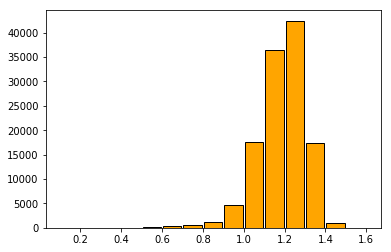

In [246]:
bins = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6]
x = plt.hist(weights, bins = bins, align="mid", rwidth = 0.9, edgecolor = "black", color = "orange")

In [247]:
x

(array([2.0000e+00, 2.0000e+00, 0.0000e+00, 2.7000e+01, 1.3500e+02,
        3.6600e+02, 6.0900e+02, 1.1410e+03, 4.7310e+03, 1.7554e+04,
        3.6503e+04, 4.2429e+04, 1.7343e+04, 9.1600e+02, 1.3000e+01]),
 array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
        1.4, 1.5, 1.6]),
 <a list of 15 Patch objects>)

In [155]:
len(edgeList)

121771

In [156]:
lengths = list()
for stock in stocks:
    lengths.append(len(finalStockData[stock]['p']))
    
from collections import Counter
lenC = Counter(lengths)
print(lenC)

Counter({765: 494})


In [157]:
fileHandle = open('edgelist_v1.txt', 'w')
for edge in edgeList:
    line = "\t".join(str(element) for element in edge)
    fileHandle.write("%s\n" % line)

In [158]:
fileHandle.close()

In [159]:
data = pd.read_csv('edgelist_v1.txt', sep="\t", header=None)
data.columns = ["V1", "V2", "weight"]

In [160]:
data.head()

,V1,V2,weight
0,A,AAL,1.189554
1,A,AAP,1.269710
2,A,AAPL,1.373192
3,A,ABBV,1.129386
4,A,ABC,1.248807


In [161]:
data.to_csv('edgelist_v1.csv', index=False)

In [162]:
sectorFile =  'finance_data/Name_sector.csv'
sectorDF = pd.read_csv(sectorFile)

In [163]:
sectorDF.head()

,Symbol,Sector
0,A,Health Care
1,AAL,Industrials
2,AAP,Consumer Discretionary
3,AAPL,Information Technology
4,ABBV,Health Care


In [164]:
sectorCompanies = dict()
for index, row in sectorDF.iterrows():
    symbol = row['Symbol']
    sector = row['Sector']
    
    if symbol not in stocks:
        continue
    if sector not in sectorCompanies:
        sectorCompanies[sector] = list()
        sectorCompanies[sector].append(symbol)
    else:
        sectorCompanies[sector].append(symbol)

In [74]:
sectorCompanies.keys()

dict_keys(['Health Care', 'Industrials', 'Consumer Discretionary', 'Information Technology', 'Consumer Staples', 'Utilities', 'Financials', 'Real Estate', 'Materials', 'Energy', 'Telecommunication Services'])

## Question4

On Entire Network

In [110]:
alpha_1 = 0
alpha_2 = 0
n_i = len(stocks) - 1
for stock in stocks:
    cond = sectorDF['Symbol'] == stock
    row = sectorDF[cond]
    q_i = len(sectorCompanies[row['Sector'].iloc[0]]) - 1
    p_i_1 = q_i / n_i
    p_i_2 = (q_i + 1) / (n_i + 1)
    alpha_1 += p_i_1
    alpha_2 += p_i_2
    
alpha_1 = alpha_1 / len(stocks)
alpha_2 = alpha_2 / len(stocks)

In [111]:
print(alpha_1)
print(alpha_2)

0.11239129185109709
0.11418807061253222


On MST

In [268]:
with open('mstAdList_v1.txt', 'r') as mstFile:
    mstADList = mstFile.readlines()

In [269]:
mstNeighbors = dict()
for line in mstADList:
    line = line.strip()
    splitLine = line.split(', ')
    stock = splitLine[0]
    neighbors = splitLine[1:]
    mstNeighbors[stock] = neighbors

In [ ]:
alpha_1 = 0
alpha_2 = 0

vcount = len(mstNeighbors)

for stock in mstNeighbors:
    cond = sectorDF['Symbol'] == stock
    row = sectorDF[cond]
    print(row.shape)
    sectorComp = sectorCompanies[row['Sector'].iloc[0]]
    neighbors = mstNeighbors[stock]
    
    n_i = len(neighbors)
    q_i = len(set(sectorComp) & set(neighbors))
    p_i_1 = q_i / n_i
    p_i_2 = len(sectorComp) / vcount
    alpha_1 += p_i_1
    alpha_2 += p_i_2
    
alpha_1 = alpha_1 / vcount
alpha_2 = alpha_2 / vcount
     

In [271]:
print(alpha_1)
print(alpha_2)

0.8289300775306759
0.11418807061253222


In [272]:
row

,Symbol,Sector
504,ZTS,Health Care


## Question 5

In [250]:
closingWeeklyData = dict()
for subdir, dir, files in os.walk(finDataPath):
    for file in files:
        fileName = finDataPath + file
        data = pd.read_csv(fileName)
        data['Date'] = pd.to_datetime(data['Date'])
        
        if data.shape[0] != 765:
            continue
            
        sampledValues = list()
        for index, row in data.iterrows():
            if row['Date'].weekday() == 0:
#                 print(row['Date'])
                sampledValues.append(row['Close'])
                
        key = file[:-4]
        closingWeeklyData[key] = sampledValues        

In [251]:
len(closingWeeklyData['ZTS'])

143

In [252]:
finalWeeklyStockData = dict()

for stock in closingWeeklyData:
    finalWeeklyStockData[stock] = dict()
    p = closingWeeklyData[stock]
    
    q = list()
    r = list()
    for i in range(1, len(p)):
        qVal = (p[i] - p[i - 1]) / p[i - 1]
            
        q.append(qVal)
        rVal = np.log(1 + qVal)
        r.append(rVal)
        
    finalWeeklyStockData[stock]['p'] = np.asarray(p)
    finalWeeklyStockData[stock]['q'] = np.asarray(q)
    finalWeeklyStockData[stock]['r'] = np.asarray(r)
    finalWeeklyStockData[stock]['r_avg'] = sum(r) / len(r)

In [253]:
edgeListWeekly = list()

stocks = list(finalWeeklyStockData.keys())

for i in range(len(stocks)):
    for j in range(i + 1, len(stocks)):
        stock_i = stocks[i]
        stock_j = stocks[j]
        r_i = finalWeeklyStockData[stock_i]['r']
        r_j = finalWeeklyStockData[stock_j]['r']
        r_i_avg = finalWeeklyStockData[stock_i]['r_avg']
        r_j_avg = finalWeeklyStockData[stock_j]['r_avg']
        
        r_ij = np.multiply(r_i, r_j)
        r_ij_avg = np.mean(r_ij)
        
        numerator = r_ij_avg - (r_i_avg * r_j_avg)
        
        denominator = np.sqrt((np.mean(np.square(r_i)) - np.square(r_i_avg)) * (np.mean(np.square(r_j)) - np.square(r_j_avg)))
        p_ij = numerator / denominator
        w_ij = np.sqrt((2 * (1 - p_ij)))
        
        edgeListWeekly.append([stock_i, stock_j, w_ij])

In [254]:
#unnormalized weights
weights = list()

stocks = list(finalWeeklyStockData.keys())

for i in range(len(stocks)):
    for j in range(i + 1, len(stocks)):
        stock_i = stocks[i]
        stock_j = stocks[j]
        r_i = finalWeeklyStockData[stock_i]['q']
        r_j = finalWeeklyStockData[stock_j]['q']
        r_i_avg = sum(r_i) / len(r_i)
        r_j_avg = sum(r_j) / len(r_j)
        
        r_ij = np.multiply(r_i, r_j)
        r_ij_avg = np.mean(r_ij)
        
        numerator = r_ij_avg - (r_i_avg * r_j_avg)
        
        denominator = np.sqrt((np.mean(np.square(r_i)) - np.square(r_i_avg)) * (np.mean(np.square(r_j)) - np.square(r_j_avg)))
        p_ij = numerator / denominator
        w_ij = np.sqrt((2 * (1 - p_ij)))
        
        weights.append(w_ij)

In [255]:
len(weights)

121771

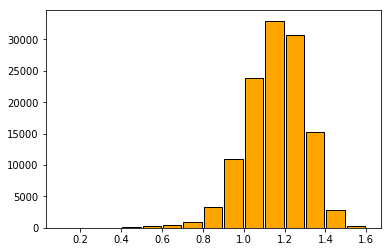

In [256]:
bins = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6]
x = plt.hist(weights, bins = bins, align="mid", rwidth = 0.9, edgecolor = "black", color = "orange")

In [257]:
x

(array([4.0000e+00, 0.0000e+00, 1.0000e+00, 6.7000e+01, 2.4500e+02,
        4.2800e+02, 8.4600e+02, 3.2930e+03, 1.0988e+04, 2.3889e+04,
        3.2974e+04, 3.0696e+04, 1.5256e+04, 2.8370e+03, 2.4000e+02]),
 array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
        1.4, 1.5, 1.6]),
 <a list of 15 Patch objects>)

In [258]:
len(edgeListWeekly)

121771

In [259]:
fileHandle = open('edgelistweekly_v1.txt', 'w')
for edge in edgeListWeekly:
    line = "\t".join(str(element) for element in edge)
    fileHandle.write("%s\n" % line)

In [260]:
fileHandle.close()

In [261]:
data = pd.read_csv('edgelistweekly_v1.txt', sep="\t", header=None)
data.columns = ["V1", "V2", "weight"]

In [262]:
data.head()

,V1,V2,weight
0,A,AAL,1.199583
1,A,AAP,1.260472
2,A,AAPL,1.426122
3,A,ABBV,1.110045
4,A,ABC,1.230741


In [263]:
data.to_csv('edgelistweekly_v1.csv', index=False)

On Entire Network

In [110]:
alpha_1 = 0
alpha_2 = 0
n_i = len(stocks) - 1
for stock in stocks:
    cond = sectorDF['Symbol'] == stock
    row = sectorDF[cond]
    q_i = len(sectorCompanies[row['Sector'].iloc[0]]) - 1
    p_i_1 = q_i / n_i
    p_i_2 = (q_i + 1) / (n_i + 1)
    alpha_1 += p_i_1
    alpha_2 += p_i_2
    
alpha_1 = alpha_1 / len(stocks)
alpha_2 = alpha_2 / len(stocks)

In [111]:
print(alpha_1)
print(alpha_2)

0.11239129185109709
0.11418807061253222


On MST

In [274]:
with open('mstAdListW_v1.txt', 'r') as mstFile:
    mstADList = mstFile.readlines()

In [275]:
mstNeighbors = dict()
for line in mstADList:
    line = line.strip()
    splitLine = line.split(', ')
    stock = splitLine[0]
    neighbors = splitLine[1:]
    mstNeighbors[stock] = neighbors

In [276]:
alpha_1 = 0
alpha_2 = 0

vcount = len(mstNeighbors)

for stock in mstNeighbors:
    cond = sectorDF['Symbol'] == stock
    row = sectorDF[cond]
    
    sectorComp = sectorCompanies[row['Sector'].iloc[0]]
    neighbors = mstNeighbors[stock]
    
    n_i = len(neighbors)
    q_i = len(set(sectorComp) & set(neighbors))
    p_i_1 = q_i / n_i
    p_i_2 = len(sectorComp) / vcount
    alpha_1 += p_i_1
    alpha_2 += p_i_2
    
alpha_1 = alpha_1 / vcount
alpha_2 = alpha_2 / vcount
     

In [277]:
print(alpha_1)
print(alpha_2)

0.7429696034959192
0.11418807061253222


In [201]:
finalStockData['ZTS']

{'p': array([30.309999, 30.639999, 30.530001, 30.889999, 30.65    , 30.48    ,
        30.540001, 30.809999, 30.73    , 30.639999, 30.459999, 30.6     ,
        30.459999, 30.280001, 30.42    , 30.33    , 30.530001, 30.700001,
        30.48    , 30.719999, 30.700001, 30.92    , 31.25    , 31.370001,
        31.610001, 31.74    , 32.009998, 32.5     , 32.130001, 31.99    ,
        32.119999, 32.130001, 32.810001, 32.889999, 32.549999, 32.459999,
        32.639999, 32.369999, 32.369999, 32.240002, 32.380001, 32.27    ,
        32.509998, 32.740002, 32.91    , 32.560001, 32.48    , 32.459999,
        32.52    , 32.369999, 32.73    , 32.389999, 32.630001, 32.209999,
        32.689999, 32.849998, 32.869999, 32.84    , 32.889999, 32.82    ,
        32.860001, 33.029999, 33.139999, 32.91    , 32.740002, 33.240002,
        32.209999, 32.299999, 31.790001, 32.32    , 32.599998, 32.450001,
        32.869999, 33.07    , 33.689999, 33.93    , 34.52    , 34.790001,
        34.889999, 34.889999, 34.